In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
from plotly.subplots import make_subplots

# Generalized Lotka–Volterra equation 

The GLV model represents the dynamics of $n$ interacting species as a set of
ordinary differential equations:

$$
\dot{x}_i = r_i x_i + A_{ii} x_i^2 + \sum_{j=1, j \neq i}^{n} A_{ij} x_i x_j, \quad i = 1, \ldots, n
$$

where:
- $\dot{x}_i (\frac{dx_i}{dt})$ is the rate of change of species $i$
- $r_i$ is the intrinsic growth rate of species $i$
- $A_{ii} < 0$ is the self-limitation coefficient term for species $i$
- $A_{ij}$ is the effect that species $j$ has upon species $i$

## Types of dynamics

### Competition

If $A_{ij}$ and $A_{ji}$ are negative, it means that the presence of species $j$ reduces the growth rate of species $i$, and vise versa, which is characteristic of competitive interaction between the species.

### Predation

If $A_{ij}$ is positive but $A_{ji}$ is negative, then species $i$ is considered to be a predator on species $j$. Notice that in the predator-prey model for two species, the intrinsic growth rate was negative while here its positive.

### Mutualizem

If $A_{ij}$ and $A_{ji}$ are positive, it means that the presence of species $j$ increases the growth rate of species $i$, and vise versa, which is characteristic of mutualistic interaction between the species. 

### Generalization

The model is "Generalized" since all the combinations of signs $(--,-+,+-,++)$ in the matrix $A$ are possible.

## Numerical solution example

### Define functions

In [4]:
def GLV(t, x, r, A):
    """
    Generalized Lotka-Volterra model for n species.
    Parameters:
    t: Time variable
    x: Array of species populations of shape (n,)
    r: Array of intrinsic growth rates of shape (n,)
    A: Interaction matrix of shape (n,n).
    Returns:
    dxdt: Derivative of x with respect to time of shape (n,)
    """
    dxdt = r * x + x * np.dot(A, x)
    return dxdt

# draw r_i from uniform distribution
def growth_rate(min_growth, max_growth, n):
    return np.random.uniform(min_growth, max_growth, n).squeeze()

# define a non-symetric interaction matrix 
def interaction_matrix(n, C, mean, sigma):
    """
    Parameters:
    n: Number of species 
    c: Connectance
    """
    interaction_matrix = np.zeros((n, n))
    random_numbers = np.random.normal(mean, sigma, size=interaction_matrix.shape)
    mask = np.random.rand(n, n) < C
    interaction_matrix[mask] = random_numbers[mask]
    np.fill_diagonal(interaction_matrix, -1)
    return interaction_matrix

def set_initial_condition(n):
    return np.random.uniform(0, 1, n)

### Solve

In [5]:
# parameters
n = 10
C = 0.1
min_growth, max_growth = 0, 1
mean, sigma = 0, 0.05
t_span = (0, 100)
x0 = set_initial_condition(n)
r = growth_rate(min_growth, max_growth, n)
A = interaction_matrix(n, C, mean, sigma)

# solution
sol = solve_ivp(GLV, t_span, x0, args=(r, A), dense_output=True)

### plot results

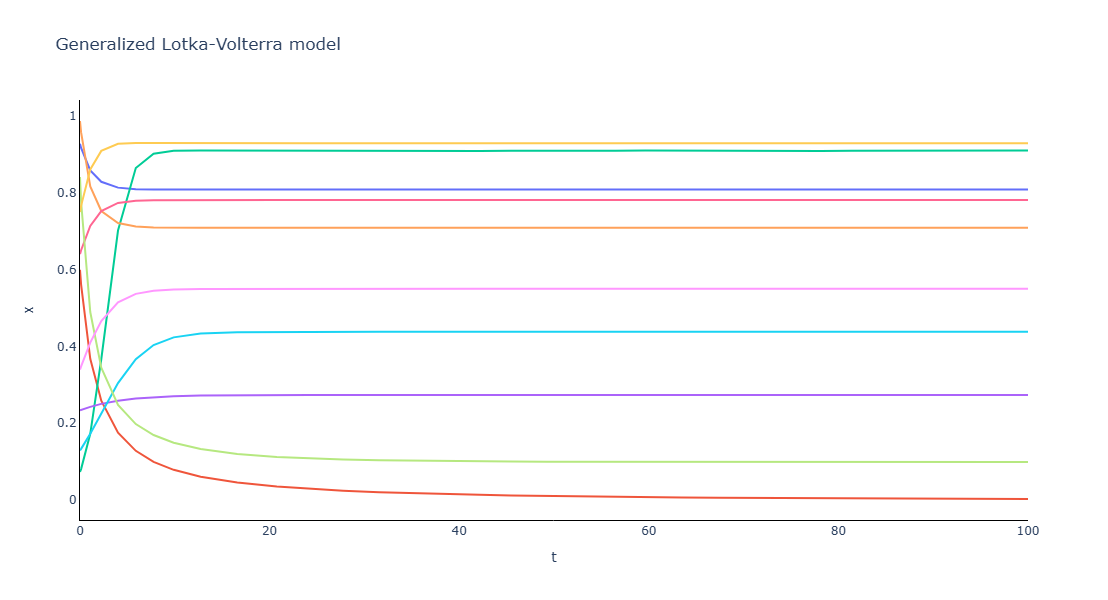

In [6]:
fig = go.Figure()

for i in range(n):
    fig.add_trace(go.Scatter(x=sol.t, y=sol.y[i], mode='lines'))

fig.update_layout(
    title='Generalized Lotka-Volterra model',
    xaxis_title='t',
    yaxis_title='x',
    showlegend=False,
    height=600,
    width=600,
    plot_bgcolor='white',  
    xaxis=dict(
        showgrid=False,  
        linecolor='black'  
    ),
    yaxis=dict(
        showgrid=False, 
        linecolor='black'  
    )
)

fig.show()

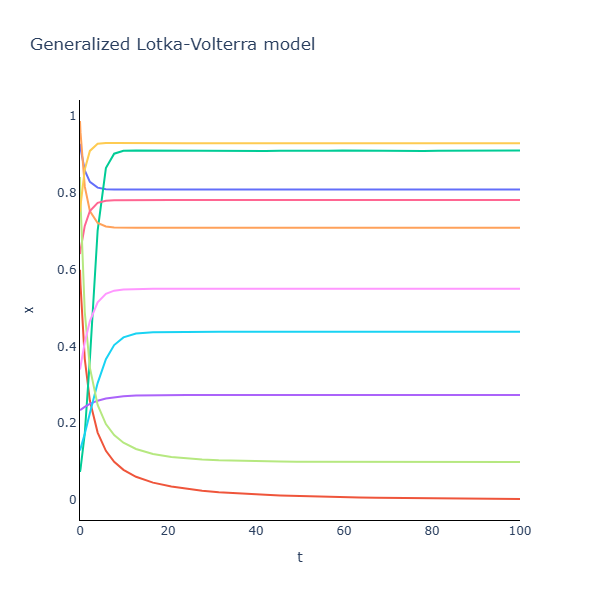
## Existence of an equilibrium

We can write the GLV model in vectirized form

$$ 
\frac{d\mathbf{x}}{dt} = \mathbf{x} \circ \mathbf{f}
$$

Where the vector $\mathbf{f}$ is given by

$$
\mathbf{f} = \mathbf{r} + A \mathbf{x}.
$$

If the matrix $A$ is not singular, then we can look for a solution of $\mathbf{r} + A \mathbf{x} = 0$ that has positive components (called a feasible equilibrium). If such a point exists, it is unique and is the solution of 

$$
A \mathbf{x^\ast} = -\mathbf{r} \Rightarrow \quad \mathbf{x^\ast} = -A^{-1} \mathbf{r}. 
$$

#### Comment:

1) If the solution for $\mathbf{x^\ast}$ does not satisfy $x_{i} > 0 \quad \forall i$, there is no unique coexistence equilibrium for all the species, and part of the species is extinct.

## Stability of an equilibrium

### local stability analysis

As we saw in lesson 2, the stability of the system determines from the community matrix

$$
M = J \bigg|_{x^\ast}
$$

where $J$ is the Jacobian matrix of the system, whose elements are defined as:

$$
J_{ij} = \frac{\partial f_i(x)}{\partial x_j}
$$

$$
J = 
\begin{pmatrix}
\frac{\partial f_1(x)}{\partial x_1} & \frac{\partial f_1(x)}{\partial x_2} & \cdots & \frac{\partial f_1(x)}{\partial x_n} \\
\frac{\partial f_2(x)}{\partial x_1} & \frac{\partial f_2(x)}{\partial x_2} & \cdots & \frac{\partial f_2(x)}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f_n(x)}{\partial x_1} & \frac{\partial f_n(x)}{\partial x_2} & \cdots & \frac{\partial f_n(x)}{\partial x_n}
\end{pmatrix}
$$

In the case of the GLV model, the community matrix is simply

$$
M = \operatorname{diag}(\mathbf{x^\ast}) A
$$

Where $\operatorname{diag}(\mathbf{x^\ast})$ is 
$$
\operatorname{diag}(\mathbf{x^\ast}) = 
\begin{pmatrix}
x_1^\ast & 0 & 0 & \cdots & 0 \\
0 & x_2^\ast & 0 & \cdots & 0 \\
0 & 0 & x_3^\ast & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & x_n^\ast
\end{pmatrix}
$$

The condition for stability is

$$
\operatorname{Re}(\lambda_1) < 0
$$

Where $\lambda_1$ is the "rightmost" eginvalue of $M$ 

### Example

In [195]:
# solve the linear problem ax=b
x_star = np.linalg.solve(A, -r)
print("The minimal value of x_star is: ", str(np.min(x_star)))
# calculate M
M = np.matmul(np.diag(x_star), A)
# find eginvalues
eigenvalues = np.linalg.eigvals(M)
real_eigenvalues = np.real(eigenvalues)

The minimal value of x_star is:  0.00709605426133526


In [196]:
print("The maximal real part of the eginvalues is: ", str(np.max(real_eigenvalues)))

The maximal real part of the eginvalues is:  -0.00709605426133526


## Complexity–stability trade-off 

Explicitly represent the interaction matrix $A$ and the intrinsic growh rates of $n$ species in large communities is impractical to do for large systems. 

May attempted to answer this question by considering a random community matrix. May considered the following algorithm to build a random community matrix $M$. Take a large community, resting at an unspecified, feasible equilibrium; we build the community matrix by setting:

1) $M_{ij} = 0$ with probability $(1 - C)$
2) with probability $C$ we draw $M_{ij}$ from a distribution with mean zero and variance $\alpha^2$. $C$ can be interpreted as the proportion of   realized connections, termed the “connectance” of the system.
3) The diagonal elements are set to $-1$.

The ecosystem can be stable as long as it satisfies the stability criterion $\alpha \sqrt{nC} < 1$.

#### Circular Law

Take a non-symmetric, $n \times n$ random matrix in which all coefficients $X_{ij}$ are i.i.d. random variables with $E[X_{ij}] = 0$ and $E[X_{ij}^2] = 1$. Then, as $n \rightarrow \infty$, the empirical spectral distribution (e.s.d.) of $X / \sqrt{n}$ converges to the circular law:

$$
\mu(\lambda) =
\begin{cases}
\frac{1}{\pi} & \text{if } (\text{Re}(\lambda))^2 + (\text{Im}(\lambda))^2 \leq 1 \\
0 & \text{otherwise}
\end{cases}
$$

#### Radius of the eigenvalue distribution

Note that the average of the eigenvalues of a matrix $A$ is given by the average of its diagonal elements 
$$ \frac{1}{n} \sum_{i} \lambda_{i} = \frac{1}{n} \text{Tr}(A) = \frac{1}{n} \sum_{i} A_{ii} $$ 
As such, if $A = dI + B$, the eigenvalues of $A$ will be those of $B$ shifted by $d$.

This result can be used to calculate the radius of the eigenvalue distribution of the matrices studied by May: when the off-diagonal coefficients $M_{ij}$ are 0 with probability $1 - C$ and are sampled independently from a distribution with mean 0 and variance $\alpha^2$ with probability $C$, we have that $E[M_{ij}] = 0$ and $E[M_{ij}^2] = C \alpha^2$. This means that if we were to divide the coefficients of $M$ by $\sqrt{C \alpha^2}$ we would recover the unit variance, and the matrix would follow the circular law when $n$ is large. Armed with this, we can calculate the radius: if the radius of $M / \sqrt{n C \alpha^2}$ converges to 1 when the matrix is large, then the radius of $M$ is approximately $\sqrt{n C \alpha^2}$. For stability, we need a sufficiently negative diagonal (setting the center of the circle), yielding May’s stability criterion:

$$
\sqrt{n C \alpha^2} < d
$$

### Example

In [34]:
def generate_random_matrix(c,sigma,n,d):
    """
    Parameters:
    n: Dimention 
    c: Connectance
    d: Diagonal elements
    sigma: Standard deviation
    """
    M = np.zeros((n, n))
    random_numbers = np.random.normal(0, sigma, size=M.shape)
    mask = np.random.rand(n, n) < c
    M[mask] = random_numbers[mask]
    np.fill_diagonal(M, -d)
    return M
    
def find_eginvalues(M):
    return np.linalg.eigvals(M)

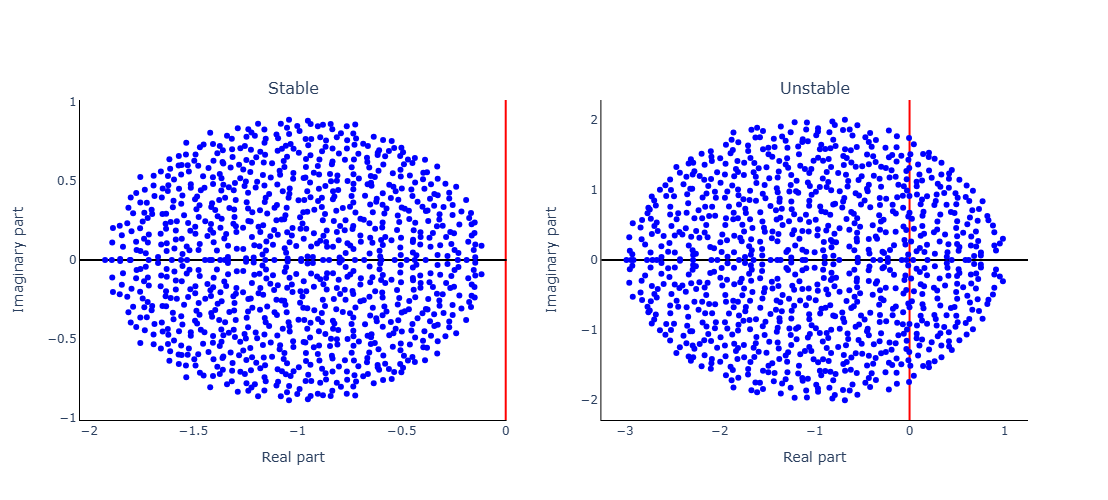

In [79]:
# Generate stable matrix
c,sigma,n,d = 0.1, 0.09, 1000, 1

M = generate_random_matrix(c,sigma,n,d)
eigenvalues_M = find_eginvalues(M)

real_parts_M = np.real(eigenvalues_M)
imaginary_parts_M = np.imag(eigenvalues_M)

# Generate unstable matrix
c,sigma,n,d = 0.1, 0.2, 1000, 1

X = generate_random_matrix(c,sigma,n,d)
eigenvalues_X = find_eginvalues(X)

real_parts_X = np.real(eigenvalues_X)
imaginary_parts_X = np.imag(eigenvalues_X)

# plots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Stable', 'Unstable'))

scatter_trace_stable = go.Scatter(
    x=real_parts_M,
    y=imaginary_parts_M,
    mode='markers',
    marker=dict(color='blue')
)

scatter_trace_unstable = go.Scatter(
    x=real_parts_X,
    y=imaginary_parts_X,
    mode='markers',
    marker=dict(color='blue')
)

fig.add_trace(scatter_trace_stable, row=1, col=1)
fig.add_trace(scatter_trace_unstable, row=1, col=2)

fig.update_layout(
    title=' ',
    plot_bgcolor='white',  
    width=1000,
    height=500,
    showlegend=False
)

fig.update_xaxes(title_text='Real part', showgrid=False, zeroline=True, zerolinecolor='red', zerolinewidth=2, linecolor='black',
                 linewidth=1, row=1, col=1)
fig.update_yaxes(title_text='Imaginary part', showgrid=False, zeroline=True, zerolinecolor='black', zerolinewidth=2, linecolor='black',
                 linewidth=1, row=1, col=1)
fig.update_xaxes(title_text='Real part', showgrid=False, zeroline=True, zerolinecolor='red', zerolinewidth=2,
                 linecolor='black', linewidth=1, row=1, col=2)
fig.update_yaxes(title_text='Imaginary part', showgrid=False, zeroline=True, zerolinecolor='black', zerolinewidth=2,
                 linecolor='black', linewidth=1, row=1, col=2)

fig.show()

#### Radius of the eigenvalue distribution

For the stable case:

$C$, $\alpha$, $n$, $d$ = $0.1, 0.09, 1000, 1$

$r \approx \sqrt{n C \alpha^2} = \sqrt{1000\cdot{0.1}\cdot 0.09^2} = 0.9$

For the Unstable case:

$C$, $\alpha$, $n$, $d$ = $0.1, 0.2, 1000, 1$

$r \approx \sqrt{n C \alpha^2} = \sqrt{1000\cdot{0.1}\cdot 0.2^2} = 2$